<a href="https://www.kaggle.com/code/kishlayambastha/pca-digit-recognis-using-knn-basics?scriptVersionId=235284003" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/mnist-digit-classification-using-knn-and-pca/submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
df.shape

(42000, 785)

In [6]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23526,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt

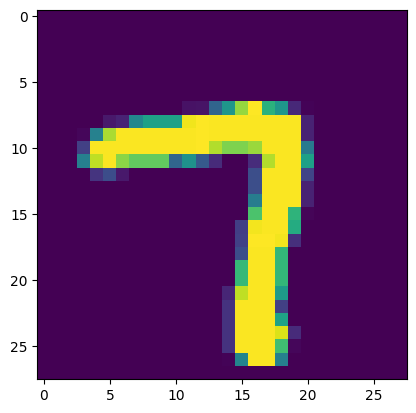

In [8]:
plt.imshow(df.iloc[34607,1:].values.reshape(28,28))

## taking  X and y

In [9]:
## here we taken all the rows but neglect the first columns i.e '0'
X = df.iloc[:,1:]  

In [10]:
## here we taken only first columns which have digit present.
y = df.iloc[:,0] 

## spliting x_train , x_test, y_train, y_test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [13]:
X_train.shape
X_test.shape

(8400, 784)

## KNNclassifier Used

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [17]:
y_pred = knn.predict(X_test)

In [18]:
# import time
# start = time.time()
# y_pred = knn.predict(X_test)
# print(time.time()-start)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9635714285714285

In [20]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn,X,y,cv=5)
print(score)

[0.96690476 0.96440476 0.96309524 0.96333333 0.96785714]


In [21]:
print("Cross_val_Score",score.mean())

Cross_val_Score 0.9651190476190477


### now we will apply PCA(tranform) then after that we again go to apply KNN

In [22]:
## StandardScalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
## import PCA then we will apply on my X_train and X_Test which we standarized

from sklearn.decomposition import PCA
pca = PCA(n_components=200)   # it gives 200 columns which imp

In [25]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [26]:
X_train_trf.shape

(33600, 200)

In [27]:
KNN = KNeighborsClassifier()

In [28]:
KNN.fit(X_train_trf,y_train)


KNeighborsClassifier()

In [29]:
y_pred = KNN.predict(X_test_trf)

In [30]:
# here we are getting this accuracy with the help of pca which we transform then 
# here we again apply knn.
accuracy_score(y_test,y_pred)  

0.9438095238095238

In [31]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
## applying standardscaler , pca, knn on test data
test_scaled = scaler.transform(df_test)
test_pca = pca.transform(test_scaled)


In [33]:
# Predict
test_predict = KNN.predict(test_pca)
test_predict

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
# final submission
submission = pd.DataFrame({
    'ImageId': range(1,len(test_predict) + 1),
    'Label' : test_predict
})
submission.head()
submission.to_csv("submission.csv",index=False)